In [1]:
%%capture
import pandas as pd
# import modin.pandas as pd
import numpy as np

import math
import seaborn as sns
import matplotlib.pyplot as plt
# import vaex # https://vaex.io/docs/index.html
import pathlib
from pathlib import *
import os
import pickle
# import cufflinks as cf
# import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

In [2]:
##TODO -> Create functions for repetitive tasks

# ,skiprows=range(3, 260000000)
# Input the csv
# Extracting a subset of 1000000 rows by default
def load_data(dir_name,base_filename):
    complete_path=os.path.join(dir_name, base_filename + "." + "csv")
    df=pd.read_csv(complete_path)
#     df = pd.concat((chunk for chunk in pd.read_csv(complete_path,sep=';',nrows=5000000,encoding= 'unicode_escape',engine='c',infer_datetime_format=True,chunksize=1000000,low_memory=False,usecols=['Numberplate','Latitude',
    #                                                                                                                           'Longitude','Meters_travelled','Time_elapsed','Point_speed','Number_of_lanes',
    #                                                                                                                           'Road_type','Road_class','Speed_restriction','TNO_Time-stamp'])))
    
#     df = pd.concat((chunk for chunk in pd.read_csv(complete_path,sep=';',nrows=20000000,encoding= 'unicode_escape',engine='c',infer_datetime_format=True,chunksize=1000000,low_memory=False)))
    return df

# Dropping the first and last row of csv ("------")
def drop_first_row(df):
    df=df.iloc[1:]
    df=df[:-1]
    return df

def resetIndex(df):
    return df.reset_index()


##TODO -> Rewrite this function

def cast_to_correct_dtype(df):
    
    if 'Id' in df.columns:
        df['Id'] = df['Id'].astype('int')
        
    if 'AOS_position_Id' in df.columns:
        df['AOS_position_Id'] = df['AOS_position_Id'].astype('int')
    
    if 'Acceleration_x' in df.columns:
        df['Acceleration_x'] = df['Acceleration_x'].astype('float')
        
    if 'Acceleration_y' in df.columns:
        df['Acceleration_y'] = df['Acceleration_y'].astype('float')
        
    if 'TNO_Valid' in df.columns:
        df['TNO_Valid'] = df['TNO_Valid'].astype('int')
    
    if 'Latitude' in df.columns:
        df['Latitude'] = df['Latitude'].astype('float')
        
    if 'Longitude' in df.columns:
        df['Longitude'] = df['Longitude'].astype('float')
        
    if 'Event/action_speed' in df.columns:
        df['Event/action_speed'] = df['Event/action_speed'].astype('int')
        
    if 'Event/action_type' in df.columns:
        df['Event/action_type'] = df['Event/action_type'].astype('int')    
        
    if 'Number_of_lanes' in df.columns:
        df['Number_of_lanes'] = df['Number_of_lanes'].astype('int')
        
    if 'Road_class' in df.columns:
        df['Road_class'] = df['Road_class'].astype('int')
        
    if 'Road_type' in df.columns:
        df['Road_type'] = df['Road_type'].astype('int')
        
    if 'Crash_position_Id' in df.columns:
        df['Crash_position_Id']=df['Crash_position_Id'].astype('int')
        
    if 'Crash_position_Id' in df.columns:
        df['Crash_position_Id'] = df['Crash_position_Id'].astype('int')
        
    if 'Point_speed' in df.columns:
        df['Point_speed'] = df['Point_speed'].astype('float')
        
    if 'Average_speed_fpp' in df.columns:
        df['Average_speed_fpp'] = df['Average_speed_fpp'].astype('float')  
        
    if 'Average_Speed' in df.columns:
        df['Average_Speed'] = df['Average_Speed'].astype('float')        

    if 'Maximum_speed' in df.columns:
        df['Maximum_speed'] = df['Maximum_speed'].astype('float')     
        
    if 'Meters_travelled' in df.columns:
        df['Meters_travelled'] = df['Meters_travelled'].astype('int')  

    if 'Road_form' in df.columns:
        df['Road_form'] = df['Road_form'].astype('int') 
        
    if 'Speed_restriction' in df.columns:
        df['Speed_restriction'] = df['Speed_restriction'].astype('int') 
        
    if 'Crash_speed' in df.columns:
        df['Crash_speed'] = df['Crash_speed'].astype('int')
        
    if 'Maximum_acceleration' in df.columns:
        df['Maximum_acceleration'] = df['Maximum_acceleration'].astype('float')
        
    if 'Numberplate' in df.columns:
        df['Numberplate']=df['Numberplate'].astype('str')
        

    return df

            

## Handling date time related fields

def cast_date_time(df):
    if 'AOS_event/action_time' in df.columns:
        df['AOS_event/action_time']=pd.datetime(df['AOS_event/action_time'],errors='coerce')
        df['AOS_event/action_time_hour']=df['AOS_event/action_time'].dt.hour
    
    if 'TNO_Trip-start' in df.columns:
        df['TNO_Trip-start'] = pd.to_datetime(df['TNO_Trip-start'],errors='coerce')
        df['TNO_Trip-start_hour'] = df['TNO_Trip-start'].dt.hour
        
    if 'TNO_Trip-end' in df.columns:
        df['TNO_Trip-end'] = pd.to_datetime(df['TNO_Trip-end'],errors='coerce')
        
    if 'Position_time' in df.columns:
        df['Position_time'] = pd.to_datetime(df['Position_time'],errors='coerce')

    if 'TNO_Time-stamp' in df.columns:
        df['TNO_Time-stamp'] = pd.to_datetime(df['TNO_Time-stamp'],errors='coerce')
        df['TNO_Time-stamp_hour'] = df['TNO_Time-stamp'].dt.hour
        
    return df

## Converting Time Stamps to datetime

def date_and_time_columns(df):
    if 'AOS_event/action_time' in df.columns:
        df['AOS Trip Date']=df['AOS_event/action_time'].dt.date
        df['AOS Event Time']=df['AOS_event/action_time'].dt.time
        df['AOS Trip Hour']=df['AOS_event/action_time'].dt.hour
    
    
    if 'TNO_Time-stamp' in df.columns:
        df['TNO Trip Date'] = df['TNO_Time-stamp'].dt.date
        df['TNO Trip Time'] = df['TNO_Time-stamp'].dt.time
        df['TNO Trip Hour']=df['TNO_Time-stamp'].dt.hour
        # df['TNO Trip Hour'] = df['TNO Trip Time'].dt.hour
    return df

def Time_of_the_day(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x < 12 ):
        return 'Morning'
    elif (x >= 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'
    
    
def rename_some_stuff(df):
    if 'Event/action_type' in df.columns:
        df["Event type Rename"]=df["Event/action_type"].replace({0: 'Headway Warning = OFF', 1: 'Headway Warning (long)', 2: 'Headway Warning (medium)'
                                                                                 ,3: 'Headway Warning (short)',10:'Lane Departure Warning = OFF',11:'Left Lane Departure Warning = ON'
                                                                                 ,12:'Right Lane Departure Warning = ON',13:'Left and Right Lane Departure Warning = ON'
                                                                                 ,20:' Indicators = OFF',21:'Left Indicator = ON',22:'Right Indicator = ON',23:'Left and Right Indicator = ON'
                                                                                 ,40:'Brakes = OFF',41:'Brakes = ON'})
        
    if 'Road_type' in df.columns:
        df["Road_type_Rename"]=df["Road_type"].replace({0: "Urban", 1: "Motorway",2:"Extra Urban",3:"Unavailable"})
        
    return df

def detect_overspeeding_count(df):
    # create a list of our conditions
#     if 'Event/action_speed' and 'Speed_restriction' in df.columns:
#         conditions = [(df['Event/action_speed']> df['Speed_restriction'])]
#         # # create a list of the values we want to assign for each condition
#         values = [1]
#         # create a new column and use np.select to assign values to it using our lists as arguments
#         df['Overspeeding_event'] = np.select(conditions, values)
        
    # return df

    if 'Point_speed' and 'Speed_restriction' in df.columns:
        conditions = [(df['Point_speed']> df['Speed_restriction'])]
        # # create a list of the values we want to assign for each condition
        values = [1]
        # create a new column and use np.select to assign values to it using our lists as arguments
        df['Overspeeding_event'] = np.select(conditions, values)
        
    return df

def some_processing(df):
    if 'Meters_travelled' in df.columns:
        df['KmTravelled']=df['Meters_travelled']/1000
    return df

TRIP DETAIL

In [ ]:
# import glob
# import os

# path=r'D:\AOS FOT\Octo\pickle_files\utrecht_leek\trips_road_1'
# all_files = glob.glob(os.path.join(path, "*.pkl"))

# df_motorway_td = pd.concat((pd.read_pickle(f) for f in all_files), ignore_index=True)

In [ ]:
df_motorway_td=pd.read_csv(r'D:\AOS FOT\Octo\CSV Export\Individual Clustering Motorway\Utrecht\df_complete_td_within_netherlands_motorways_utrecht_leek.csv',encoding= 'unicode_escape')
df_motorway_td

In [ ]:
groupby_df_motorway_td = df_motorway_td.groupby("platedate_copy")["Meters_travelled"].sum()
# groupby_df_motorway_td

In [ ]:
#grouping df based on platedate_copy 
# (Note:Here you need to manually check the range of distance that's common and add that to next step so that we can extract the same road)

df_motorway_td_grouped=df_motorway_td.groupby('platedate_copy').sum() 
df_motorway_td_grouped

# rslt_df = df_motorway_td_grouped.loc[(df_motorway_td_grouped['KmTravelled'] >= 70) & (df_motorway_td_grouped['KmTravelled'] <=90)] #Road 1 - (Utrecht-Eindhoven)


rslt_df = df_motorway_td_grouped.loc[(df_motorway_td_grouped['KmTravelled'] >= 150) & (df_motorway_td_grouped['KmTravelled'] <=180)] #Road 1 - (Utrecht to Leek - Highway A27-A6-A7)
# rslt_df = df_utrecht_leek_filtered_grouped.loc[(df_utrecht_leek_filtered_grouped['KmTravelled'] >= 180) & (df_utrecht_leek_filtered_grouped['KmTravelled'] <=220)] #Road 2 - (Utrecht to Leek - Highway A28)

rslt_df=rslt_df.reset_index()
platedate_copy_same_road=rslt_df['platedate_copy']
platedate_copy_same_road # List of platedates that pass through the same road

In [ ]:
df = df_motorway_td[df_motorway_td['platedate_copy'].isin(platedate_copy_same_road)] # Extract complete df
df=df.loc[:,~df.columns.str.startswith('B')]# dropping extra columns that start with N (platedate names)
df=df.loc[:,~df.columns.str.startswith('N')]# dropping extra columns that start with N (platedate names)

In [ ]:
df

In [ ]:
df = df.drop(df[df['platedate_copy']=='BTDS932009-05-14'].index)
df = df.drop(df[df['platedate_copy']=='BTFT452009-05-18'].index)
df = df.drop(df[df['platedate_copy']=='BTHN952009-01-13'].index)
df = df.drop(df[df['platedate_copy']=='BVFP922008-11-22'].index)
df = df.drop(df[df['platedate_copy']=='BTFX652008-10-10'].index)
df = df.drop(df[df['platedate_copy']=='BVFP912008-10-12'].index)
df = df.drop(df[df['platedate_copy']=='BTFX642008-10-01'].index)
df = df.drop(df[df['platedate_copy']=='BTDB402008-11-08'].index)
df = df.drop(df[df['platedate_copy']=='BTDB402008-11-06'].index)
# df = df.drop(df[df['platedate_copy']=='BTFX642008-10-01'].index)

fig = px.scatter_mapbox(df,lat="Latitude",lon="Longitude",title="Utrecht-Leek  111 Trips (71 Trucks)",color="platedate_copy")

fig.update_layout(mapbox_style="open-street-map",margin={"r":0.75,"t":25,"l":0,"b":0},title_x=0.5)
# fig.update_layout()
fig.show()

In [ ]:
df['Numberplate'] = df['platedate_copy'].str[0:6]

In [ ]:
len(df['Numberplate'].unique())

In [ ]:
df=df_motorway_td

In [ ]:
def pre_processing(df):
    df = df.drop(df[df['Average_speed_fpp']==0].index) # Dropping rows where driver is still 
    df['Numberplate_copy'] = df['Numberplate'] # creating copy of numberplate
#     df['platedate_copy'] = df['platedate'] # creating copy of platedate
    return df

def creating_grps(df):
    """This function will split df into two groups to calculate mean speed 
    and total distance travelled by each numberplate in Urban areas within that city"""
    
    df_groupby_mean = df.groupby(['Numberplate']).mean()
    df_groupby_mean.reset_index(inplace=True)
    
    df_groupby_sum = df.groupby(['Numberplate']).sum()
    df_groupby_sum.reset_index(inplace=True)
    
    return df_groupby_mean,df_groupby_sum

def dropping_columns_mean(df):
    df=df.drop(['Unnamed: 0', 'Id', 'Header_Id',
             'Trip_Summary_Id','Status',
             'Meters_travelled', 'Time_elapsed','Average_speed_fpp',
             'Point_AOS_headway','Road_type', 'Road_class',
             'Road_form', 'Speed_restriction', 'TNO_Valid', 'TNO_Day',
             'TNO_Area_Valid', 'TNO_Time_elapsed', 'TNO_Average_speed','Overspeeding_event',
             'KmTravelled'], axis = 1)
    return df 

def dropping_columns_sum(df):
    df=df.drop(['Unnamed: 0', 'Id', 'Header_Id',
             'Trip_Summary_Id', 'Latitude', 'Longitude', 'Status',
             'Meters_travelled', 'Time_elapsed', 'Average_speed_fpp',
             'Point_AOS_headway', 'Road_type', 'Road_class',
             'Road_form', 'Speed_restriction', 'TNO_Valid', 'TNO_Day',
             'TNO_Area_Valid', 'TNO_Time_elapsed', 'TNO_Average_speed','Point_speed'], axis = 1)
    return df

In [ ]:
df = df.loc[df['Road_type'] == 1]
df = (df.pipe(cast_to_correct_dtype).pipe(rename_some_stuff).pipe(detect_overspeeding_count).pipe(some_processing))
df=df.loc[:,~df.columns.str.startswith('W')]# dropping extra columns that start with N (platedate names)

# df_intra_city_trip_detail

In [ ]:
df_groupby_mean,df_groupby_sum = (df.pipe(pre_processing).pipe(creating_grps))
df_groupby_sum=dropping_columns_sum(df_groupby_sum)
df_groupby_mean=dropping_columns_mean(df_groupby_mean)


def merge(df_groupby_sum,df_groupby_mean):
    df = pd.merge(df_groupby_mean,df_groupby_sum, on='Numberplate', how='outer') #here Numberplate is common column
    df=df.rename(columns={'Point_speed': 'Point_speed_mean_intra_city',
                   'Overspeeding_event': 'Overspeeding_event_sum_intra_city',
                   'KmTravelled': 'KmTravelled_sum_intra_city'})
    df['norm_overspeeding']=df['Overspeeding_event_sum_intra_city']/df['KmTravelled_sum_intra_city']
    return df
    
df_motorway_grouped_trip_detail=merge(df_groupby_sum,df_groupby_mean)
df_motorway_grouped_trip_detail

In [ ]:
# df_motorway_grouped_trip_detail=df_motorway_grouped_trip_detail.loc[:,~df_motorway_grouped_trip_detail.columns.str.startswith('B')]# dropping extra columns that start with N (platedate names)
# df_motorway_grouped_trip_detail=df_motorway_grouped_trip_detail.loc[:,~df_motorway_grouped_trip_detail.columns.str.startswith('N')]# dropping extra columns that start with N (platedate names)
# # df_motorway_grouped_trip_detail.drop(['Number_of_lanes_x', 'Number_of_lanes_y'], axis = 1, inplace = True) 
# df_motorway_grouped_trip_detail

AOS Summary

In [ ]:
# dir_name=r"D:\AOS FOT\Octo\pickle_files\utrecht_leek\trips_road_1\AOS_Summary"

# path=os.path.join(dir_name)

# all_files = glob.glob(os.path.join(path, "*.pkl"))

# df_motorway_aos = pd.concat((pd.read_pickle(f) for f in all_files), ignore_index=True)
# df_motorway_aos=df_motorway_aos[df_motorway_aos['Road_type_Rename']=='Motorway']
# df_motorway_aos=df_motorway_aos.loc[:,~df_motorway_aos.columns.str.startswith('W')]# dropping extra columns that start with N (platedate names)

In [ ]:
df_motorway_aos=pd.read_csv(r"D:\AOS FOT\Octo\CSV Export\Individual Clustering Motorway\Utrecht\df_complete_aos_within_netherlands_motorways_utrecht_leek.csv")
df_motorway_aos=df_motorway_aos[df_motorway_aos['Road_type']==1]

In [ ]:
df_motorway_aos

In [ ]:
city_name="utrecht_leek_complete"

In [ ]:
df_motorway_aos['Numberplate'] = df_motorway_aos['platedate'].str[0:6]

In [ ]:
%%capture
def total_aos_event_count(df):
    df=df.groupby(['Numberplate','Event type Rename']).size().unstack(fill_value=0)
    df.reset_index(inplace=True)
    return df

def merge_aos_events_trip_detail(total_aos_event_count,df_city_grouped_trip_detail):
    df = pd.merge(df_city_grouped_trip_detail, total_aos_event_count, on='Numberplate', how='outer') #here id is common column
    df = df.dropna(axis = 0, how = 'any')
    return df

def normalizing_events_count(df):
    df['norm_Indicators = OFF']=df[' Indicators = OFF']/df['KmTravelled_sum_intra_city']
    df['norm_brakes = OFF']=df['Brakes = OFF']/df['KmTravelled_sum_intra_city']
    df['norm_brakes = ON']=df['Brakes = ON']/df['KmTravelled_sum_intra_city']
    df['norm_headway_warning(long)']=df['Headway Warning (long)']/df['KmTravelled_sum_intra_city']
    df['norm_headway_warning(medium)']=df['Headway Warning (medium)']/df['KmTravelled_sum_intra_city']
    df['norm_headway_warning(short)']=df['Headway Warning (short)']/df['KmTravelled_sum_intra_city']
    df['norm_Headway Warning = OFF']=df['Headway Warning = OFF']/df['KmTravelled_sum_intra_city']
    df['norm_Lane Departure Warning = OFF']=df['Lane Departure Warning = OFF']/df['KmTravelled_sum_intra_city']
    df['norm_Left Indicator = ON']=df['Left Indicator = ON']/df['KmTravelled_sum_intra_city']
    df['norm_Left Lane Departure Warning = ON']=df['Left Lane Departure Warning = ON']/df['KmTravelled_sum_intra_city']
    df['norm_Left and Right Indicator = ON']=df['Left and Right Indicator = ON']/df['KmTravelled_sum_intra_city']
    df['norm_Right Indicator = ON']=df['Right Indicator = ON']/df['KmTravelled_sum_intra_city']
    df['norm_Right Lane Departure Warning = ON']=df['Right Lane Departure Warning = ON']/df['KmTravelled_sum_intra_city']
    
    return df

df_total_aos_event_count=total_aos_event_count(df_motorway_aos)
df_grp_aos_trip_detail=merge_aos_events_trip_detail(df_total_aos_event_count,df_motorway_grouped_trip_detail)
df_grp_aos_trip_detail=normalizing_events_count(df_grp_aos_trip_detail)
df_grp_aos_trip_detail['Motorway'] = city_name


In [ ]:
df_grp_aos_trip_detail

In [ ]:
df_grp_aos_trip_detail.drop(['Overspeeding_event_sum_intra_city','norm_overspeeding', ' Indicators = OFF', 'Brakes = OFF', 'Brakes = ON',
       'Headway Warning (long)', 'Headway Warning (medium)',
       'Headway Warning (short)', 'Headway Warning = OFF',
       'Lane Departure Warning = OFF', 'Left Indicator = ON',
       'Left Lane Departure Warning = ON', 'Left and Right Indicator = ON',
       'Right Indicator = ON', 'Right Lane Departure Warning = ON',
       'norm_Indicators = OFF', 'norm_brakes = OFF','norm_Headway Warning = OFF',
       'norm_Lane Departure Warning = OFF', 'norm_Left Indicator = ON','norm_Right Indicator = ON','norm_Left and Right Indicator = ON'], axis = 1, inplace = True) 


In [ ]:
df_grp_aos_trip_detail.rename(columns={'Point_speed_mean_intra_city': 'Mean Point Speed (km/h)',
                   'KmTravelled_sum_intra_city':'Distance Covered (km)',
                   'norm_brakes = ON':'Normalized Braking Events',
                   'norm_headway_warning(long)': 'Normalized Level I-HW',
                   'norm_headway_warning(medium)': 'Normalized Level II-HW',
                   'norm_headway_warning(short)': 'Normalized Level III-HW',
                   'norm_Right Lane Departure Warning = ON': 'Normalized R-LDW',
                   'norm_Left Lane Departure Warning = ON': 'Normalized L-LDW'},
          inplace=True, errors='raise')

In [ ]:
df_grp_aos_trip_detail.to_csv(r"D:\AOS FOT\Octo\CSV Export\Individual Clustering Motorway\df_grp_aos_trip_detail_complete_utrecht_leek_highway.csv")

In [ ]:
list_df_grp_aos_trip_detail=list(df_grp_aos_trip_detail['Numberplate'])
len(list_df_grp_aos_trip_detail)

In [ ]:
df_complete_td=pd.read_pickle(r"D:\AOS FOT\Octo\pickle_files\utrecht_eindhoven\df_complete_td_within_netherlands_motorways_utrecht_eindhoven.pkl")

In [ ]:
df = df_complete_td[df_complete_td['Numberplate'].isin(list_df_grp_aos_trip_detail)] # Extract complete df
df

In [ ]:
df.to_csv(r"D:\AOS FOT\Octo\pickle_files\utrecht_eindhoven\df_complete_td_within_netherlands_motorways_utrecht_eindhoven_updated.csv")

In [ ]:
df_complete_aos=pd.read_pickle(r"D:\AOS FOT\Octo\pickle_files\utrecht_eindhoven\df_complete_aos_within_netherlands_motorways_utrecht_eindhoven.pkl")

In [ ]:
df = df_complete_aos[df_complete_aos['Numberplate'].isin(list_df_grp_aos_trip_detail)] # Extract complete df
df

In [ ]:
pd.read_csv(r"D:\AOS FOT\Octo\pickle_files\utrecht_eindhoven\df_complete_aos_within_netherlands_motorways_utrecht_eindhoven_updated.csv")

In [ ]:
df_grp_aos_trip_detail.to_csv(r"D:\AOS FOT\Octo\CSV Export\Individual Clustering Motorway\df_grp_aos_trip_detail_utrecht_eindhoven_highway.csv")

In [ ]:
# # os.environ["RAY_DISABLE_MEMORY_MONITOR"] = "1" 
# import ray
# ray.init()

## Build pipelines with Pandas 

df_AOS_SUMMARY = (load_data(r"D:\AOS FOT\Octo\CSV Export\Individual Clustering Motorway\Utrecht","df_complete_aos_within_netherlands_motorways_utrecht_leek")
                                      .pipe(drop_first_row)
                                      .pipe(resetIndex)
#                                       .pipe(cast_to_correct_dtype)
#                                       .pipe(cast_date_time)
#                                       .pipe(date_and_time_columns)
                                      .pipe(rename_some_stuff))
df_AOS_SUMMARY.head()


In [ ]:
df_AOS_SUMMARY.to_csv(r"D:\AOS FOT\Octo\CSV Export\Individual Clustering Motorway\Utrecht\df_complete_aos_within_netherlands_motorways_utrecht_leek.csv")

### Clustering

In [1]:
%%capture
import pandas as pd
# import modin.pandas as pd
import numpy as np

import math
import seaborn as sns
import matplotlib.pyplot as plt
# import vaex # https://vaex.io/docs/index.html
import pathlib
from pathlib import *
import os
import pickle
# import cufflinks as cf
# import chart_studio.plotly as py
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
df_grp_aos_trip_detail_amsterdam=pd.read_csv(r"D:\AOS FOT\Octo\CSV Export\Individual Clustering Motorway\df_grp_aos_trip_detail_utrecht_eindhoven_highway.csv")
df_grp_aos_trip_detail_complete_amsterdam=pd.read_csv(r"D:\AOS FOT\Octo\CSV Export\Individual Clustering Motorway\df_grp_aos_trip_detail_complete_utrecht_eindhoven_highway.csv")
# city_name='Amsterdam'
# location="Amsterdam"
# location1="across the NL"

In [2]:
df_grp_aos_trip_detail_zwolle=pd.read_csv(r"D:\AOS FOT\Octo\CSV Export\Individual Clustering Motorway\df_grp_aos_trip_detail_utrecht_leek_highway.csv")
df_grp_aos_trip_detail_complete_zwolle=pd.read_csv(r"D:\AOS FOT\Octo\CSV Export\Individual Clustering Motorway\df_grp_aos_trip_detail_complete_utrecht_leek_highway.csv")

In [3]:
df_grouped_cities=pd.concat([df_grp_aos_trip_detail_zwolle, df_grp_aos_trip_detail_complete_zwolle])
df_grouped_cities = df_grouped_cities.drop(df_grouped_cities[df_grouped_cities['Normalized Braking Events']>4].index)
df_grouped_cities = df_grouped_cities.drop(df_grouped_cities[df_grouped_cities['Normalized Level I-HW']>3].index)




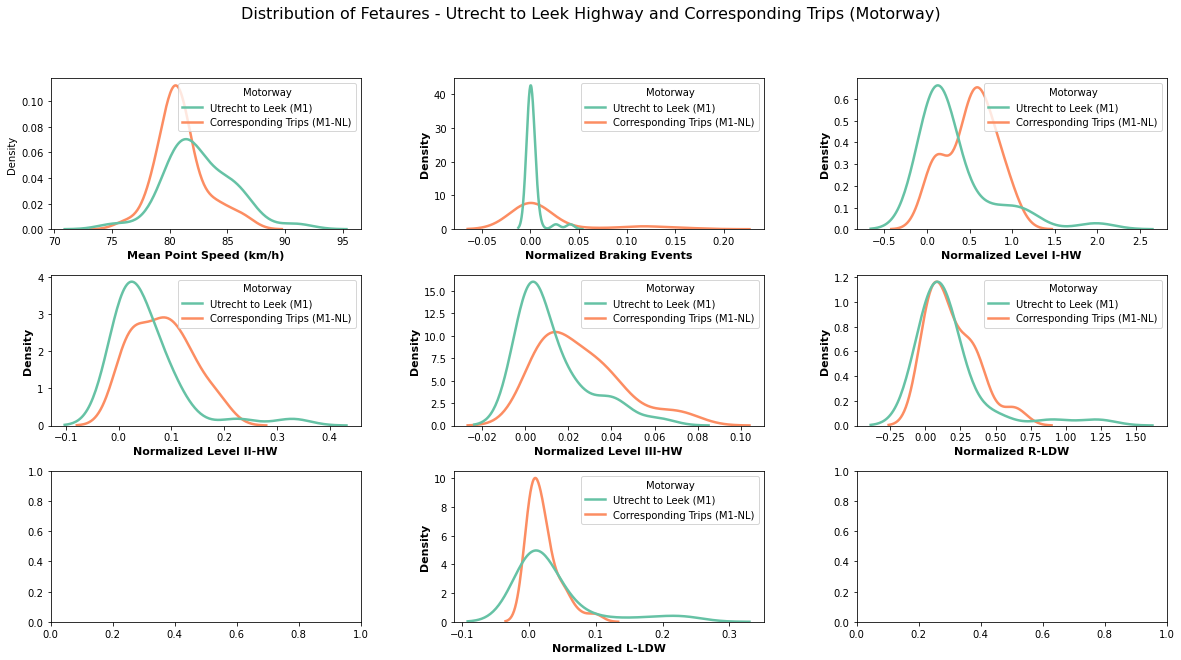

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
# sns.set_context("notebook")
fig.suptitle('Distribution of Fetaures - Utrecht to Leek Highway and Corresponding Trips (Motorway)',fontsize=16)
# sns.set_context("notebook", font_scale=1.25)
sns.kdeplot(ax=axes[0,0],data=df_grouped_cities,x="Mean Point Speed (km/h)",hue="Motorway",palette="Set2",linewidth=2.5)
axes[0,0].set_xlabel('Density',fontsize=11, fontdict=dict(weight='bold'))
axes[0,0].set_xlabel('Mean Point Speed (km/h)',fontsize=11,fontdict=dict(weight='bold'))

sns.kdeplot(ax=axes[0, 1], data=df_grouped_cities, x="Normalized Braking Events",linewidth=2.5,hue="Motorway",palette="Set2")
axes[0,1].set_ylabel('Density',fontsize=11, fontdict=dict(weight='bold'))
axes[0,1].set_xlabel('Normalized Braking Events',fontsize=11,fontdict=dict(weight='bold'))

sns.kdeplot(ax=axes[0, 2], data=df_grouped_cities, x='Normalized Level I-HW',linewidth=2.5,hue="Motorway",palette="Set2")
axes[0,2].set_ylabel('Density',fontsize=11, fontdict=dict(weight='bold'))
axes[0,2].set_xlabel('Normalized Level I-HW',fontsize=11,fontdict=dict(weight='bold'))

sns.kdeplot(ax=axes[1, 0], data=df_grouped_cities, x='Normalized Level II-HW',linewidth=2.5,hue="Motorway",palette="Set2")
axes[1,0].set_ylabel('Density',fontsize=11, fontdict=dict(weight='bold'))
axes[1,0].set_xlabel('Normalized Level II-HW',fontsize=11,fontdict=dict(weight='bold'))

sns.kdeplot(ax=axes[1, 1], data=df_grouped_cities, x='Normalized Level III-HW',linewidth=2.5,hue="Motorway",palette="Set2")
axes[1,1].set_ylabel('Density',fontsize=11, fontdict=dict(weight='bold'))
axes[1,1].set_xlabel('Normalized Level III-HW',fontsize=11,fontdict=dict(weight='bold'))

sns.kdeplot(ax=axes[1,2], data=df_grouped_cities, x='Normalized R-LDW',linewidth=2.5,hue="Motorway",palette="Set2")
axes[1,2].set_ylabel('Density',fontsize=11, fontdict=dict(weight='bold'))
axes[1,2].set_xlabel('Normalized R-LDW',fontsize=11,fontdict=dict(weight='bold'))

sns.kdeplot(ax=axes[2,1], data=df_grouped_cities, x='Normalized L-LDW',linewidth=2.5,hue="Motorway",palette="Set2")
axes[2,1].set_ylabel('Density',fontsize=11, fontdict=dict(weight='bold'))
axes[2,1].set_xlabel('Normalized L-LDW',fontsize=11,fontdict=dict(weight='bold'))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3) #make the figure look better
plt.savefig(r"C:\Users\ivasu\Desktop\figure.png")


In [5]:
# fig, axes = plt.subplots(3, 3, figsize=(20, 10))
# # sns.set_context("notebook")
# sns.set_palette("pastel")
# fig.suptitle('Distribution of Fetaures - Utrecht-Eindhoven Highway and Corresponding Trips (Motorway)',fontsize=16)
# # sns.set_context("notebook", font_scale=1.25)
# sns.kdeplot(ax=axes[0,0],data=df_grp_aos_trip_detail_zwolle,x="Mean Point Speed (km/h)",linewidth=2.5,label="Utrecht to Leek (M1)")
# sns.kdeplot(ax=axes[0,0],data=df_grp_aos_trip_detail_amsterdam,x="Mean Point Speed (km/h)",linewidth=2.5,label="Utrecht to Eindhoven (M2)")
# axes[0,0].set_xlabel('Density',fontsize=11, fontdict=dict(weight='bold'))
# axes[0,0].set_xlabel('Mean Point Speed (km/h)',fontsize=11,fontdict=dict(weight='bold'))
# axes[0,0].legend(loc="upper left")


# sns.kdeplot(ax=axes[0,1],data=df_grp_aos_trip_detail_zwolle,x="Normalized Braking Events",linewidth=2.5,label="Utrecht to Leek (M1)")
# sns.kdeplot(ax=axes[0,1],data=df_grp_aos_trip_detail_amsterdam,x="Normalized Braking Events",linewidth=2.5,label="Utrecht to Eindhoven (M2)")
# axes[0,1].set_xlabel('Density',fontsize=11, fontdict=dict(weight='bold'))
# axes[0,1].set_xlabel('Normalized Braking Events',fontsize=11,fontdict=dict(weight='bold'))
# axes[0,1].legend(loc="upper left")





# # sns.kdeplot(ax=axes[0, 1], data=df_grouped_cities, x="Normalized Braking Events",linewidth=2.5,hue="Motorway",palette="pastel")
# # axes[0,1].set_ylabel('Density',fontsize=11, fontdict=dict(weight='bold'))
# # axes[0,1].set_xlabel('Normalized Braking Events',fontsize=11,fontdict=dict(weight='bold'))

# # sns.kdeplot(ax=axes[0, 2], data=df_grouped_cities, x='Normalized Level I-HW',linewidth=2.5,hue="Motorway",palette="pastel")
# # axes[0,2].set_ylabel('Density',fontsize=11, fontdict=dict(weight='bold'))
# # axes[0,2].set_xlabel('Normalized Level I-HW',fontsize=11,fontdict=dict(weight='bold'))

# # sns.kdeplot(ax=axes[1, 0], data=df_grouped_cities, x='Normalized Level II-HW',linewidth=2.5,hue="Motorway",palette="pastel")
# # axes[1,0].set_ylabel('Density',fontsize=11, fontdict=dict(weight='bold'))
# # axes[1,0].set_xlabel('Normalized Level II-HW',fontsize=11,fontdict=dict(weight='bold'))

# # sns.kdeplot(ax=axes[1, 1], data=df_grouped_cities, x='Normalized Level III-HW',linewidth=2.5,hue="Motorway",palette="pastel")
# # axes[1,1].set_ylabel('Density',fontsize=11, fontdict=dict(weight='bold'))
# # axes[1,1].set_xlabel('Normalized Level III-HW',fontsize=11,fontdict=dict(weight='bold'))

# # sns.kdeplot(ax=axes[1,2], data=df_grouped_cities, x='Normalized R-LDW',linewidth=2.5,hue="Motorway",palette="pastel")
# # axes[1,2].set_ylabel('Density',fontsize=11, fontdict=dict(weight='bold'))
# # axes[1,2].set_xlabel('Normalized R-LDW',fontsize=11,fontdict=dict(weight='bold'))

# # sns.kdeplot(ax=axes[2,1], data=df_grouped_cities, x='Normalized L-LDW',linewidth=2.5,hue="Motorway",palette="pastel")
# # axes[2,1].set_ylabel('Density',fontsize=11, fontdict=dict(weight='bold'))
# # axes[2,1].set_xlabel('Normalized L-LDW',fontsize=11,fontdict=dict(weight='bold'))
# # plt.subplots_adjust(wspace = 0.3, hspace = 0.3) #make the figure look better

In [6]:
df_grouped_cities.columns

Index(['Unnamed: 0', 'Numberplate', 'Latitude', 'Longitude',
       'Mean Point Speed (km/h)', 'Distance Covered (km)',
       'Normalized Braking Events', 'Normalized Level I-HW',
       'Normalized Level II-HW', 'Normalized Level III-HW', 'Normalized L-LDW',
       'Normalized R-LDW', 'Motorway', 'Number_of_lanes_x',
       'Number_of_lanes_y'],
      dtype='object')

In [7]:
feature="Normalized Braking Events"
city_name="Utrecht to Leek"


In [8]:
def preprocess(df,feature):
    """Preprocess data for KMeans clustering"""
    
    data = np.array(df[feature])
    data=data.reshape(-1, 1)
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    
    return data

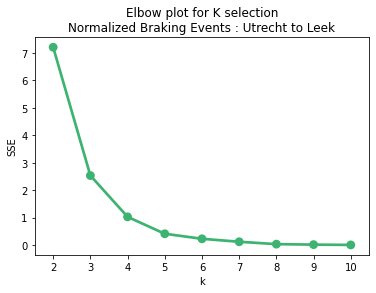

In [9]:

def elbow_plot(data):
    """Create elbow plot from normalized data"""
    
    sse = {}
    
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(data)
        sse[k] = kmeans.inertia_
    
    plt.title('Elbow plot for K selection'+"\n"+feature+" : "+ city_name)
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),y=list(sse.values()),color="mediumseagreen")
    plt.show()

data = preprocess(df_grouped_cities,feature)
elbow_plot(data)

In [10]:
# data = preprocess(df_grp_aos_trip_detail,"Point_speed_mean_intra_city")

def silhouette_coeff(data):
    """Checking silhouette score"""
    
    range_n_clusters = range(2,10)
    
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters)
        preds = clusterer.fit_predict(data)
        centers = clusterer.cluster_centers_

        score = silhouette_score(data, preds)
        print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
silhouette_coeff(data)

For n_clusters = 2, silhouette score is 0.9393692574399687)
For n_clusters = 3, silhouette score is 0.9302792874284533)
For n_clusters = 4, silhouette score is 0.9231320168133896)
For n_clusters = 5, silhouette score is 0.9132692201701738)
For n_clusters = 6, silhouette score is 0.9037479397461456)
For n_clusters = 7, silhouette score is 0.8954626689531561)
For n_clusters = 8, silhouette score is 0.8772264245603107)
For n_clusters = 9, silhouette score is 0.8754568727336487)


In [11]:
# data = preprocess(df_grp_aos_trip_detail,"Point_speed_mean_intra_city")

def find_k(data,feature,increment=0, decrement=0):
    """Find the optimum k clusters"""
    
    data = preprocess(data,feature)
    sse = {}
    
    for k in range(2, 21):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(data)
        sse[k] = kmeans.inertia_
    
    kn = KneeLocator(x=list(sse.keys()), 
                 y=list(sse.values()), 
                 curve='convex', 
                 direction='decreasing')
    k = kn.knee + increment - decrement
    return k

In [12]:
def run_kmeans(df,feature, increment=0, decrement=0):
    """Run KMeans clustering, including the preprocessing of the data
    and the automatic selection of the optimum k. 
    """
    
    data = preprocess(df,feature)
    k = find_k(df,feature, increment, decrement)
    print(k)
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(data)
    return df.assign(Clusters=kmeans.labels_)

In [17]:
# feature="norm_headway_warning(short)"
Clusters= run_kmeans(df_grouped_cities,feature, decrement=2)
Clusters

<ipython-input-11-3ccee7d4c943>:11: ConvergenceWarning:

Number of distinct clusters (13) found smaller than n_clusters (14). Possibly due to duplicate points in X.

<ipython-input-11-3ccee7d4c943>:11: ConvergenceWarning:

Number of distinct clusters (13) found smaller than n_clusters (15). Possibly due to duplicate points in X.

<ipython-input-11-3ccee7d4c943>:11: ConvergenceWarning:

Number of distinct clusters (13) found smaller than n_clusters (16). Possibly due to duplicate points in X.

<ipython-input-11-3ccee7d4c943>:11: ConvergenceWarning:

Number of distinct clusters (13) found smaller than n_clusters (17). Possibly due to duplicate points in X.

<ipython-input-11-3ccee7d4c943>:11: ConvergenceWarning:

Number of distinct clusters (13) found smaller than n_clusters (18). Possibly due to duplicate points in X.

<ipython-input-11-3ccee7d4c943>:11: ConvergenceWarning:

Number of distinct clusters (13) found smaller than n_clusters (19). Possibly due to duplicate points in X.



3


<ipython-input-11-3ccee7d4c943>:11: ConvergenceWarning:

Number of distinct clusters (13) found smaller than n_clusters (20). Possibly due to duplicate points in X.



,Unnamed: 0,Numberplate,Latitude,Longitude,Mean Point Speed (km/h),Distance Covered (km),Normalized Braking Events,Normalized Level I-HW,Normalized Level II-HW,Normalized Level III-HW,Normalized L-LDW,Normalized R-LDW,Motorway,Number_of_lanes_x,Number_of_lanes_y,Clusters
0,0,BDHZ36,52.758936,5.756246,83.514286,151.765,0.000000,1.179455,0.329457,0.039535,0.171317,0.177907,Utrecht to Leek (M1),NaN,NaN,0
1,1,BFRT22,52.679005,5.679415,86.533443,317.128,0.000000,1.040589,0.104059,0.040993,0.037840,1.226634,Utrecht to Leek (M1),NaN,NaN,0
2,3,BLBF83,52.689231,5.689962,80.034164,467.949,0.002137,0.671013,0.029918,0.000000,0.032055,0.143178,Utrecht to Leek (M1),NaN,NaN,0
3,4,BLLG10,52.612504,5.608255,85.284530,151.949,0.000000,0.171110,0.072393,0.019743,0.039487,0.164529,Utrecht to Leek (M1),NaN,NaN,0
4,7,BNXD69,52.565838,5.565944,75.296970,167.400,0.000000,0.101553,0.005974,0.000000,0.047790,0.047790,Utrecht to Leek (M1),NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,29,BVLD09,51.715857,5.694491,81.815311,19479.008,0.000000,0.168643,0.081010,0.035423,0.006314,0.111813,Corresponding Trips (M1-NL),0.891220,8242.0,0
30,30,BVPT90,51.962996,5.198204,80.511617,17957.286,0.000000,0.110763,0.034248,0.006850,0.006515,0.050564,Corresponding Trips (M1-NL),0.943979,8004.0,0
31,31,BVRP66,52.323767,5.768025,82.896899,12809.239,0.000000,0.135996,0.037473,0.008978,0.006558,0.079084,Corresponding Trips (M1-NL),0.817603,4877.0,0
32,32,BVRP67,52.353892,5.814568,84.216654,11172.939,0.000000,0.111161,0.045019,0.010293,0.004565,0.088875,Corresponding Trips (M1-NL),0.822282,4266.0,0


Text(0.5, 0, 'Normalized Braking Events')

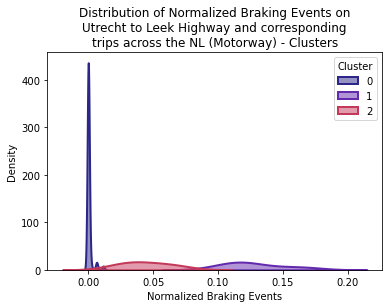

In [18]:
sns.set_palette("CMRmap")
sns.kdeplot(Clusters[Clusters['Clusters']==0][feature],label="0",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(Clusters[Clusters['Clusters']==1][feature],label="1",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(Clusters[Clusters['Clusters']==2][feature],label="2",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(Clusters[Clusters['Clusters']==3][feature],label="3",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(Clusters[Clusters['Clusters']==4][feature],label="4",fill=True,alpha=0.5,linewidth=2)
# sns.kdeplot(Clusters[Clusters['Clusters']==4]['Point_speed'],label="4",fill=True,alpha=0.5,linewidth=2)
plt.legend(title="Cluster")
plt.title("Distribution of "+feature +" on" + "\n" + city_name +" Highway and corresponding"+"\n"+"trips across the NL (Motorway) - Clusters")
plt.xlabel(feature)


In [19]:
Clusters['Motorway'].unique()

array(['Utrecht to Leek (M1)', 'Corresponding Trips (M1-NL)'],
      dtype=object)

In [20]:
highway_name='Utrecht to Leek (M1)'
corresponding_trips='Corresponding Trips (M1-NL)'

df_city=Clusters.loc[Clusters['Motorway']==highway_name]
df_city = df_city.drop(df_city[df_city.Numberplate=='WPR23X'].index)
df_not_city=Clusters.loc[Clusters['Motorway']==corresponding_trips]

Text(0.5, 0, 'Mean Point Speed (km/h)')

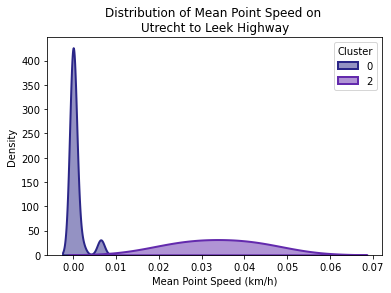

In [21]:
sns.set_palette("CMRmap")
sns.kdeplot(df_city[df_city['Clusters']==0][feature],label="0",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(df_city[df_city['Clusters']==1][feature],label="1",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(df_city[df_city['Clusters']==2][feature],label="2",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(df_city[df_city['Clusters']==3][feature],label="3",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(df_city[df_city['Clusters']==4][feature],label="4",fill=True,alpha=0.5,linewidth=2)
plt.legend(title="Cluster")
plt.title(r"Distribution of Mean Point Speed on "+"\n"+city_name+" Highway")
plt.xlabel("Mean Point Speed (km/h)")

c:\Users\ivasu\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



Text(0.5, 0, 'Mean Point Speed (km/h)')

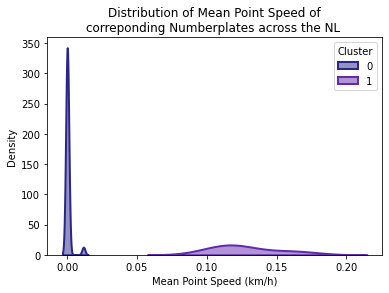

In [22]:
sns.set_palette("CMRmap")
sns.kdeplot(df_not_city[df_not_city['Clusters']==0][feature],label="0",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(df_not_city[df_not_city['Clusters']==1][feature],label="1",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(df_not_city[df_not_city['Clusters']==2][feature],label="2",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(df_not_city[df_not_city['Clusters']==3][feature],label="3",fill=True,alpha=0.5,linewidth=2)
sns.kdeplot(df_not_city[df_not_city['Clusters']==4][feature],label="4",fill=True,alpha=0.5,linewidth=2)
plt.legend(title="Cluster")
plt.title(r"Distribution of Mean Point Speed of"+"\n"+"correponding Numberplates across the NL ")
plt.xlabel("Mean Point Speed (km/h)")

In [23]:
df_outer = pd.merge(df_city, df_not_city, on='Numberplate', how='inner') #here Numberplate is common column
df_outer

,Unnamed: 0_x,Numberplate,Latitude_x,Longitude_x,Mean Point Speed (km/h)_x,Distance Covered (km)_x,Normalized Braking Events_x,Normalized Level I-HW_x,Normalized Level II-HW_x,Normalized Level III-HW_x,...,Normalized Braking Events_y,Normalized Level I-HW_y,Normalized Level II-HW_y,Normalized Level III-HW_y,Normalized L-LDW_y,Normalized R-LDW_y,Motorway_y,Number_of_lanes_x_y,Number_of_lanes_y_y,Clusters_y
0,0,BDHZ36,52.758936,5.756246,83.514286,151.765,0.000000,1.179455,0.329457,0.039535,...,0.000000,0.079124,0.024705,0.004967,0.007938,0.032346,Corresponding Trips (M1-NL),1.118674,12556.0,0
1,1,BFRT22,52.679005,5.679415,86.533443,317.128,0.000000,1.040589,0.104059,0.040993,...,0.000000,0.691015,0.144637,0.061461,0.017820,0.630407,Corresponding Trips (M1-NL),0.942509,8574.0,0
2,3,BLBF83,52.689231,5.689962,80.034164,467.949,0.002137,0.671013,0.029918,0.000000,...,0.110459,0.753229,0.075031,0.015367,0.047707,0.370241,Corresponding Trips (M1-NL),0.942241,18010.0,1
3,4,BLLG10,52.612504,5.608255,85.284530,151.949,0.000000,0.171110,0.072393,0.019743,...,0.000000,0.497605,0.141040,0.048567,0.054534,0.283910,Corresponding Trips (M1-NL),1.062791,10951.0,0
4,7,BNXD69,52.565838,5.565944,75.296970,167.400,0.000000,0.101553,0.005974,0.000000,...,0.000000,0.612256,0.121802,0.041608,0.048320,0.266922,Corresponding Trips (M1-NL),1.086452,15910.0,0
5,8,BNZF66,52.666904,5.661519,90.929825,476.688,0.000000,0.000000,0.000000,0.002098,...,0.000000,0.006033,0.003152,0.001685,0.000163,0.003642,Corresponding Trips (M1-NL),1.245234,9668.0,0
6,11,BPRR36,52.652644,5.652691,81.251506,772.869,0.001294,0.029759,0.001294,0.002588,...,0.011577,0.415254,0.038037,0.014001,0.030958,0.154299,Corresponding Trips (M1-NL),0.990588,35363.0,0
7,12,BPRT62,52.623450,5.608486,85.389397,113.773,0.026368,0.184578,0.061526,0.043947,...,0.115190,0.570779,0.197152,0.069137,0.007928,0.363057,Corresponding Trips (M1-NL),0.913188,11550.0,1
8,13,BPTG15,52.693190,5.683913,82.838710,152.928,0.000000,0.202710,0.032695,0.000000,...,0.000000,0.766256,0.110662,0.024411,0.017901,0.058490,Corresponding Trips (M1-NL),0.981049,9629.0,0
9,14,BPTG27,52.650932,5.642005,80.767888,158.313,0.006317,0.221081,0.018950,0.012633,...,0.161814,0.713489,0.183590,0.075614,0.014580,0.348004,Corresponding Trips (M1-NL),0.979980,12727.0,1


Text(0.5, 0, 'Cluster')

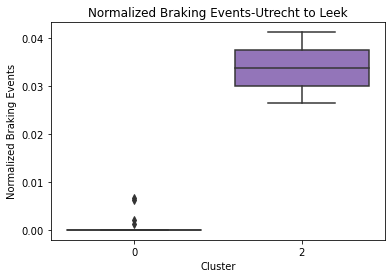

In [24]:
import matplotlib as mpl
ax = sns.boxplot(x=df_city['Clusters'],y=df_city[feature],fliersize=5)
for patch in ax.artists:
    fc = patch.get_facecolor()
    patch.set_facecolor(mpl.colors.to_rgba(fc, 0.7))
    
    

plt.title(feature+"-"+city_name)
plt.ylabel(feature)

# plt.ylabel("Mean Point Speed in Amsterdam (km/h)")
plt.xlabel("Cluster")

# plt.title(r"Mean Point Speed of Number plates"+"\n"+r"based on assigned cluster")

In [ ]:
df_city_cluster0=df_city[df_city['Clusters']==0]
df_city_cluster0_nums=list(df_city_cluster0['Numberplate'])

df_city_cluster1=df_city[df_city['Clusters']==1]
df_city_cluster1_nums=list(df_city_cluster1['Numberplate'])

df_city_cluster2=df_city[df_city['Clusters']==2]
df_city_cluster2_nums=list(df_city_cluster2['Numberplate'])

df_city_cluster3=df_city[df_city['Clusters']==3]
df_city_cluster3_nums=list(df_city_cluster3['Numberplate'])

df_city_cluster4=df_city[df_city['Clusters']==4]
df_city_cluster4_nums=list(df_city_cluster4['Numberplate'])

df_city_cluster5=df_city[df_city['Clusters']==5]
df_city_cluster5_nums=list(df_city_cluster5['Numberplate'])

In [ ]:
df_not_city_cluster0_nums = df_not_city[df_not_city['Numberplate'].isin(df_city_cluster0_nums)]
df_not_city_cluster0_nums['Cluster_city']=0
df_not_city_cluster1_nums = df_not_city[df_not_city['Numberplate'].isin(df_city_cluster1_nums)]
df_not_city_cluster1_nums['Cluster_city']=1
df_not_city_cluster2_nums = df_not_city[df_not_city['Numberplate'].isin(df_city_cluster2_nums)]
df_not_city_cluster2_nums['Cluster_city']=2
df_not_city_cluster3_nums = df_not_city[df_not_city['Numberplate'].isin(df_city_cluster3_nums)]
df_not_city_cluster3_nums['Cluster_city']=3

df_not_city_cluster4_nums = df_not_city[df_not_city['Numberplate'].isin(df_city_cluster4_nums)]
df_not_city_cluster4_nums['Cluster_city']=4

In [ ]:
list_of_dataframes=[df_not_city_cluster0_nums,df_not_city_cluster1_nums,df_not_city_cluster2_nums,df_not_city_cluster3_nums]
df_not_city_new_clus = pd.concat(list_of_dataframes)
df_not_city_new_clus

In [ ]:
import matplotlib as mpl
ax = sns.boxplot(x=df_not_city_new_clus['Cluster_city'],y=df_not_city_new_clus[feature],fliersize=5)
for patch in ax.artists:
    fc = patch.get_facecolor()
    patch.set_facecolor(mpl.colors.to_rgba(fc, 0.7))
    
plt.ylabel(feature+"across the NL")
plt.xlabel("Cluster")
plt.title(feature+" of corresponding "+"\n"+r"number plates based on assigned cluster")


In [ ]:
df_outer.columns

In [ ]:
# feature="Normalized R-LDW"

In [ ]:
feature_x="Mean Point Speed (km/h)"
location="_x"
location1="_y"

In [ ]:
df_outer['cluster_comp'] = np.where(df_outer['Clusters_x']==df_outer['Clusters_y'], 'True', 'False')

In [ ]:
a=df_outer[df_outer['cluster_comp']=='True']
# a['clusters_utrecht'].value_counts()
len(df_outer[df_outer['cluster_comp']=='True'])/len(df_outer)*100

In [ ]:
df_outer_true=df_outer[df_outer['cluster_comp']=="True"]

In [ ]:
df_outer_true['Clusters_y'].value_counts()/len(df_outer_true)*100

In [ ]:
df_outer[df_outer['Clusters_x']==1]['Normalized Braking Events_x'].max()

In [ ]:
sns.set_palette("CMRmap")
sns.scatterplot(data=df_outer[df_outer['Clusters_x']==0],x=feature+location,y=feature+location1,alpha=0.8,label=0)
sns.scatterplot(data=df_outer[df_outer['Clusters_x']==1],x=feature+location,y=feature+location1,alpha=0.8,label=1)
sns.scatterplot(data=df_outer[df_outer['Clusters_x']==2],x=feature+location,y=feature+location1,alpha=0.8,label=2)
sns.scatterplot(data=df_outer[df_outer['Clusters_x']==3],x=feature+location,y=feature+location1,alpha=0.8,label=3)
plt.legend(title="Cluster")
plt.xlabel(feature+"-"+city_name)
plt.ylabel(feature+" across the Netherlands")
plt.title(feature+ " of Numberplates "+"\n"+"and their corresponding clusters")

In [ ]:
sns.scatterplot(data=df_outer,x=feature+"_x",y=feature+"_y",hue="Clusters_x",palette="CMRmap")
plt.legend(title="Cluster")
plt.xlabel("Mean Point Speed in Amsterdam")
plt.ylabel("Mean Point Speed in and around the Netherlands")
plt.title(r"Mean Point Speed of Numberplates"+"\n"+r"assigned same cluster on Urban roads"+"\n"+r"Correlation Coefficient "+ r"$ (r)$ = 0.88")

In [ ]:
h=sns.jointplot(x=feature+"_x", y=feature+"_y", data=df_outer, kind="reg",palette="pastel",color="mediumseagreen")
h.set_axis_labels(feature+' on Utrecht-Leek Highway (M1)', feature+ ' across the NL (M1-NL)', fontsize=10)
# h.ax_joint.set_xticks([0,0.1,0.2,0.3,0.4,1.0,1.2,1.4,1.6,1.8])

In [ ]:
#  import pandas as pd 
#  import seaborn as sns
#  import matplotlib.pyplot as plt 
# import stats
from scipy import stats
# sns.set(rc = {'figure.figsize':(15,8)})
# from matplotlib import rcParams

# # figure size in inches
# rcParams['figure.figsize'] = 15,8


# feature_x="Mean Point Speed in "
# feature_y="Mean Point Speed "
# sns.set_style("ticks")
# df = pd.read_excel('data.xlsx')
# assume some random columns called EAV and PAV in your DataFrame 
# assume a third variable used for grouping called "Mammal" which will be used for color coding
p = sns.lmplot(x=feature+"_x", y=feature+"_y",
        data=df_outer,scatter_kws={"color": "mediumseagreen"},
        line_kws={'label':"Linear Reg","color":"mediumseagreen"}, legend=True)

ax = p.axes[0, 0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
# ax.set(xlabel='Mean Point Speed on Utrecht-Eindhoven Highway', ylabel='Mean Point Speed across the NL')


# assuming you computed r_squared which is the coefficient of determination somewhere else
slope, intercept, r_value, p_value, std_err = stats.linregress(df_outer[feature+"_x"],df_outer[feature+"_y"])
label_line_1 = r'$y={0:.1f}x+{1:.1f}'.format(slope,intercept)
label_line_2 = r'$r:{0:.2f}$'.format(r_value) # as an exampple or whatever you want[!
# L_labels[0].set_text(label_line_1)
L_labels[0].set_text(label_line_2)

# plt.title("Normalized Braking Events - Amsterdam & the NL (Urban Roads)")